<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor



# Обозначим некоторые переменные, которые пригодятся в работе в дальнейшем
METALS = ['au', 'ag', 'pb']
TARGETS = ['final.output.recovery', 'rougher.output.recovery']
CONCENTRATE = ['rougher.input.feed',
    'rougher.output.concentrate',
    'primary_cleaner.output.concentrate',
    'final.output.concentrate']
RANDOM_STATE = 12345

In [2]:
# Загрузим данные
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=True)
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date', parse_dates=True)
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date', parse_dates=True)

In [3]:
# Напишем функцию для описания данных
def check_df(df):
    print("Количество строк:", df.shape[0])
    print("Количество столбцов:", df.shape[1])
    df.info()
    display(df.describe())
    display(df.head(5))

In [4]:
check_df(df_train)

Количество строк: 14149
Количество столбцов: 86
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float6

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
check_df(df_test)

Количество строк: 5290
Количество столбцов: 52
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   pr

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
check_df(df_full)

Количество строк: 19439
Количество столбцов: 86
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float6

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


*Вывод*:
- Выгрузили данные и изучили их;
- Во многих признках есть пропуски.

In [7]:
# Напишем функцию для рассчета эффективности обогащения
def efficiency_recovery(rougher_output, rougher_input, rougher_tail):
    recovery = (rougher_output * (rougher_input - rougher_tail)) / (rougher_input * (rougher_output - rougher_tail)) * 100
    
    recovery[recovery < 0] = np.nan
    recovery[recovery > 100] = np.nan
    return recovery

In [8]:
# Применим функцию и найдем эффективность обогащения
efficiency = efficiency_recovery(df_train['rougher.output.concentrate_au'], 
    df_train['rougher.input.feed_au'], 
    df_train['rougher.output.tail_au'])

In [9]:
print(efficiency.describe())

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
dtype: float64


In [10]:
# Посчитаем MAE
mae_recovery = mean_absolute_error(df_train['rougher.output.recovery'].dropna(), efficiency.dropna())
print('MAE =', mae_recovery)

MAE = 9.73512347450521e-15


*Вывод*:
Стандартное отклонение оказалось довольно небольшим, а значит эффективность рассчитана правильно.

In [11]:
# Выведем признаки, которые недоступны в тестовой выборке
a = df_test.columns
b = df_train.columns
c = []
for i in b:
    if i not in a:
        c.append(i)
print(df_train[c].dtypes)
print("Количество отсутсвующих признаков в тестовой выборке:", len(c))

final.output.concentrate_ag                           float64
final.output.concentrate_pb                           float64
final.output.concentrate_sol                          float64
final.output.concentrate_au                           float64
final.output.recovery                                 float64
final.output.tail_ag                                  float64
final.output.tail_pb                                  float64
final.output.tail_sol                                 float64
final.output.tail_au                                  float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.concentrate_pb                 float64
primary_cleaner.output.concentrate_sol                float64
primary_cleaner.output.concentrate_au                 float64
primary_cleaner.output.tail_ag                        float64
primary_cleaner.output.tail_pb                        float64
primary_cleaner.output.tail_sol                       float64
primary_

*Вывод*:
- Скорее всего, в тестовом датасете отсутсвуют те признаки, которые являются либо целевыми, либо расчетными;
- Все признаки имеют тип данных float64.

In [12]:
print("Количество дупликатов:", df_train.duplicated().sum())

Количество дупликатов: 0


In [13]:
print("Количество дупликатов:", df_test.duplicated().sum())

Количество дупликатов: 0


In [14]:
print("Количество дупликатов:", df_full.duplicated().sum())

Количество дупликатов: 0


In [15]:
# Вытянем соответствующие по индексам таргеты из df_full для df_test
print(df_test.shape)
df_test = df_test.merge(df_full[TARGETS].loc[df_test.index], on='date', how='left')
print(df_test.shape)

(5290, 52)
(5290, 54)


In [16]:
# Удалим строки с пропусками в таргетах
df_train = df_train.dropna(subset=TARGETS)
df_test = df_test.dropna(subset=TARGETS)

In [17]:
# Заполним пропуски в датасетах ближайшими предыдущими значениями 
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

**Вывод**:
- Загрузили и изучили данные;
- Посчитали метрику MAE между расчетами и значениями признака 'rougher.output.recovery' и сделали вывод;
- Проанализировали признаки, которых нет в тестовой выборке: ими оказались целевые признаки или расчетные признаки;
- Убедились в том, что дубликатов нет;
- Заполнили пропуски предыдущими значениями из строки.

## Анализ данных

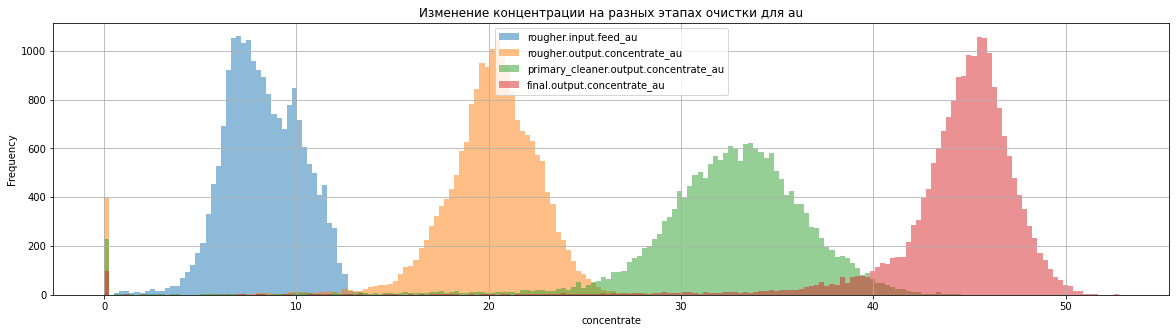

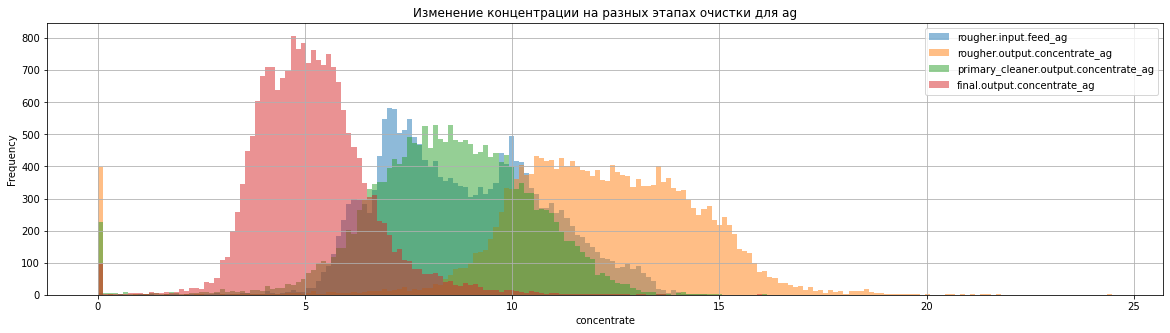

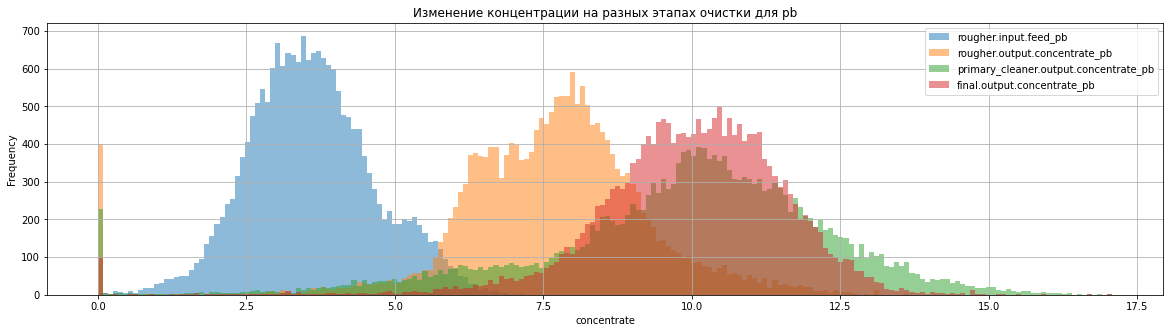

In [18]:
# Изменение концетрации на разных этапах очистки
for metal in METALS:
    met = [f'{x}_{metal}' for x in CONCENTRATE]
    
    df_full[met].plot(
        title = f'Изменение концентрации на разных этапах очистки для {metal}',
        kind='hist', 
        bins=200, 
        grid=True, 
        legend=True,
        figsize=(20, 5),
        alpha=0.5,
    ).set(xlabel='concentrate') 
    
    plt.show()

In [19]:
# Создадим датафрейм со средними значениями концентрации трех металлов (Au, Ag, Pb) на каждом этапе очистки
mean_conc_df = pd.DataFrame({'rougher.input.feed':[df_full['rougher.input.feed_au'].mean(), df_full['rougher.input.feed_ag'].mean(),
                            df_full['rougher.input.feed_pb'].mean()], 'rougher.output.concentrate':[df_full['rougher.output.concentrate_au'].mean(),
                            df_full['rougher.output.concentrate_ag'].mean(), df_full['rougher.output.concentrate_pb'].mean()],
                             'primary_cleaner.output.concentrate':[df_full['primary_cleaner.output.concentrate_au'].mean(), df_full['primary_cleaner.output.concentrate_ag'].mean(), 
                            df_full['primary_cleaner.output.concentrate_pb'].mean()], 'final.output.concentrate':[df_full['final.output.concentrate_au'].mean(),
                            df_full['final.output.concentrate_ag'].mean(), df_full['final.output.concentrate_pb'].mean()]}, index=['au', 'ag', 'pb'])

In [20]:
mean_conc_df

,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
au,8.266097,19.772000,32.119400,44.076513
ag,8.794927,11.994759,8.442408,5.168470
pb,3.598085,7.606272,9.829530,9.978895


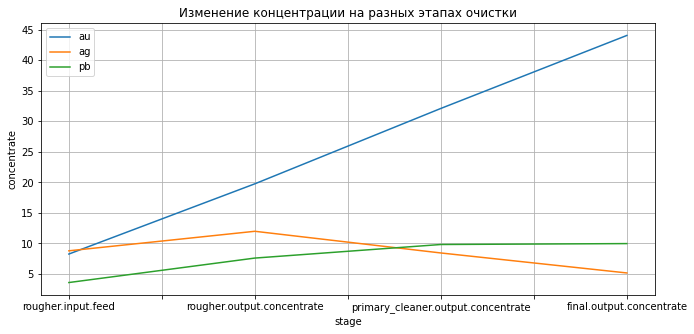

In [21]:
for metal in METALS:
    mean_conc_df.loc[metal].plot(title='Изменение концентрации на разных этапах очистки', 
        grid=True, 
        legend=True, 
        figsize=(11, 5)
    ).set(xlabel='stage', ylabel ='concentrate')
plt.show()

Вывод об изменении концентрации металлов на разных этапах очистки:
- Концентрация Au линейно растет. В конечном итоге она возросла в 5,33 раз;
- Концентрация Ag возрастала до второго этапа, а позже стала падать. В итоге концентрация уменьшилась в 1,7 раз;
- Концентрация Pb плавно возрастала и изменилась в 2,77 раз.

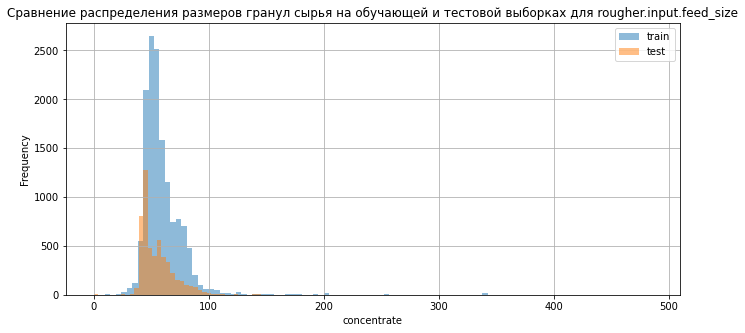

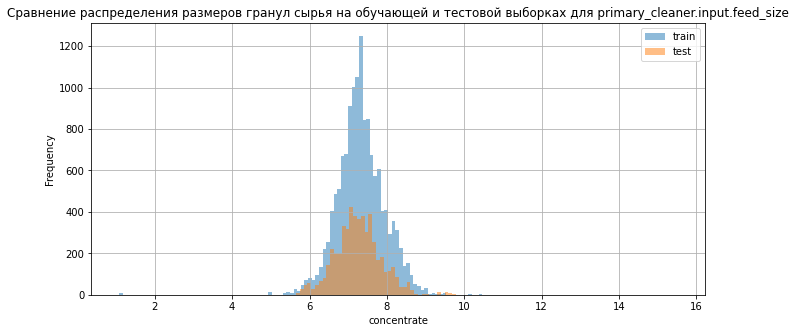

In [22]:
# Сравним распределение размеров гранул сырья на обучающей и тестовой выборках
for metric in ('rougher.input.feed_size', 'primary_cleaner.input.feed_size'):
    for label, df in (('train', df_train), ('test', df_test)): 
        df[metric].plot(
                title = 'Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках для {}'.format(metric),
                kind='hist', 
                bins=100, 
                grid=True, 
                legend=True,
                figsize=(11, 5),
                alpha=0.5,
                label=label,
            ).set(xlabel='concentrate')
  
    plt.show()

*Вывод*: распределения мало отличаются друг от друга, а следовательно оценка будет правильной.

In [23]:
# Суммарная концентрация веществ на разных стадиях. Добавили эту информацию в df_train
for metric in CONCENTRATE:
    df_train[metric] = 0
    for metal in METALS + ['sol']:
        df_train[metric] += df_train['{}_{}'.format(metric, metal)]
    
df_train[CONCENTRATE].head(10)

,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
date,,,,
2016-01-15 00:00:00,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,47.859163,65.908382,71.321010,64.004667
2016-01-15 05:00:00,48.838521,64.955919,70.607932,63.646320
2016-01-15 06:00:00,49.120760,65.372419,71.165854,63.156407
2016-01-15 07:00:00,50.790724,65.180132,71.533310,62.908843
2016-01-15 08:00:00,50.550288,65.625127,72.072013,64.185763


In [24]:
# Функция для визуализации данных
def concen_desc(column):
    display(column.describe())
    display(column.plot(kind='hist', grid=True, bins=40))
    plt.show()
    display(column.plot(kind='box', grid=True))
    plt.show()

count    14149.000000
mean        56.242170
std          7.029808
min          0.040000
25%         52.573579
50%         56.627635
75%         60.763234
max         74.458253
Name: rougher.input.feed, dtype: float64

<AxesSubplot:ylabel='Frequency'>

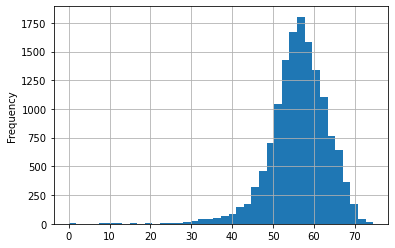

<AxesSubplot:>

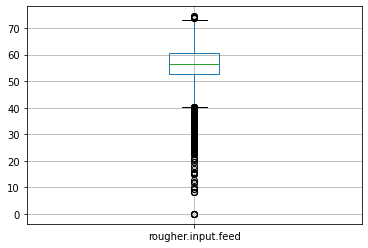

In [25]:
concen_desc(df_train['rougher.input.feed'])

count    14149.000000
mean        67.173145
std         12.713129
min          0.000000
25%         64.914390
50%         69.175663
75%         73.429261
max         88.140119
Name: rougher.output.concentrate, dtype: float64

<AxesSubplot:ylabel='Frequency'>

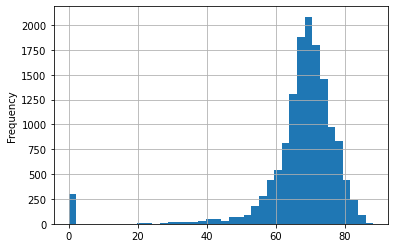

<AxesSubplot:>

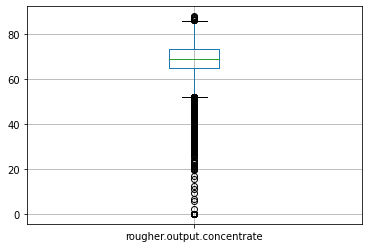

In [26]:
concen_desc(df_train['rougher.output.concentrate'])

count    14149.000000
mean        60.172546
std         10.448165
min          0.000000
25%         58.046816
50%         61.786946
75%         65.355951
max         76.918076
Name: primary_cleaner.output.concentrate, dtype: float64

<AxesSubplot:ylabel='Frequency'>

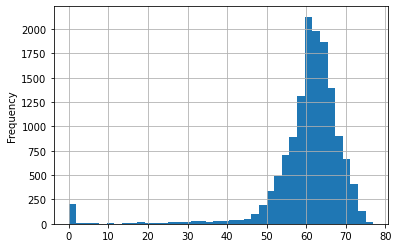

<AxesSubplot:>

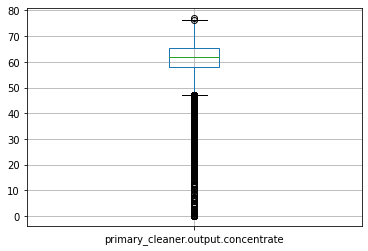

In [27]:
concen_desc(df_train['primary_cleaner.output.concentrate'])

count    14149.000000
mean        68.387872
std          7.023723
min          0.000000
25%         67.559819
50%         69.141502
75%         70.974661
max         80.210644
Name: final.output.concentrate, dtype: float64

<AxesSubplot:ylabel='Frequency'>

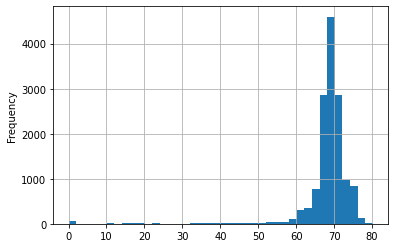

<AxesSubplot:>

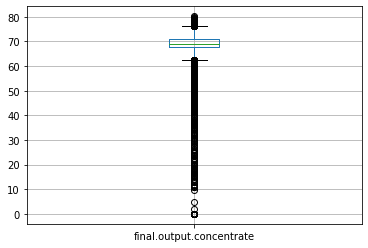

In [28]:
concen_desc(df_train['final.output.concentrate'])

In [29]:
def function_1(df, concentrate):
    for col in concentrate:
        q1 = df[col].quantile(q=0.25)
        q3 = df[col].quantile(q=0.75)
        iqr = q3-q1
        df = df.loc[df[col] > (q1 - 1.5*iqr)]
        df = df.loc[df[col] < (q3 + 1.5*iqr)]
    return df    

In [30]:
function_1(df_train, CONCENTRATE)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,53.415050,70.781325,59.001692,68.098589
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,53.696482,70.539603,59.703912,68.274362
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,54.589604,55.376330,59.561096,68.226068


*Вывод*:
- Исследовали суммарную концентрацию всех металлов на каждом этапе обработки;
- В тренировочной выборке удалили строки, содержащие аномальные значения - 16,2% от объема всей выборки.

## Модель

In [38]:
# Напишем функцию для расчета итоговой sMAPE
def smape(target, prediction):
    prediction_df = pd.DataFrame(prediction)
    target_1 = np.array(target['rougher.output.recovery'])
    prediction_1 = np.array(prediction_df.loc[:, 1])
    target_2 = np.array(target['final.output.recovery'])
    prediction_2 = np.array(prediction_df.loc[:, 0])
    
    count_1 = np.sum(2 * np.abs(target_1 - prediction_1) / (np.abs(target_1) + np.abs(prediction_1) + 1e-10))
    smape_rougher = (count_1 / len(target_1)) * 100 
   
    count_2 =  np.sum(2 * np.abs(target_2 - prediction_2) / (np.abs(target_2) + np.abs(prediction_2) + 1e-10))
    smape_final = (count_2 / len(target_2)) * 100 
    grand_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return grand_smape

In [32]:
# Функция для нахождения разницы в столбцах между двумя датасетами
def fields_diff(first_df, second_df):
    return set(first_df.columns.to_list()) - set(second_df.columns.to_list())

In [33]:
# Удалим ненужные столбцы
missing_test_fields = fields_diff(df_train, df_test)
print(missing_test_fields)
df_train = df_train.drop(missing_test_fields, axis='columns')
print(fields_diff(df_train, df_test))
print(fields_diff(df_test, df_train))


{'secondary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'final.output.concentrate', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.tail_pb', 'final.output.concentrate_pb', 'rougher.input.feed', 'primary_cleaner.output.concentrate_sol', 'rougher.output.concentrate_ag', 'final.output.tail_sol', 'primary_cleaner.output.tail_sol', 'rougher.output.tail_sol', 'secondary_cleaner.output.tail_ag', 'rougher.output.tail_au', 'final.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'final.output.tail_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'final.output.concentrate_ag', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.tail_au', 'rougher.output.concentra

In [39]:
# Создаем scorer
scorer = make_scorer(smape, greater_is_better=False)

In [35]:
# Разделим датасеты на признаки и таргеты
features_train = df_train.drop(TARGETS, axis=1)
target_train = df_train[TARGETS]
features_test = df_test.drop(TARGETS, axis=1)
target_test = df_test[TARGETS]

In [36]:
target_train

,final.output.recovery,rougher.output.recovery
date,,
2016-01-15 00:00:00,70.541216,87.107763
2016-01-15 01:00:00,69.266198,86.843261
2016-01-15 02:00:00,68.116445,86.842308
2016-01-15 03:00:00,68.347543,87.226430
2016-01-15 04:00:00,66.927016,86.688794
...,...,...
2018-08-18 06:59:59,73.755150,89.574376
2018-08-18 07:59:59,69.049291,87.724007
2018-08-18 08:59:59,67.002189,88.890579


In [40]:
# Решающее дерево
param_grid = {'max_depth': range(2, 15)}

model_1 = DecisionTreeRegressor(random_state=RANDOM_STATE)
search_1 = GridSearchCV(model_1, param_grid, cv=5, scoring=scorer)
search_1.fit(features_train, target_train)
print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(-search_1.best_score_, search_1.best_params_))

Лучшее значение sMAPE для дерева решений: 10.952668842668487 при значениях гиперпараметров: {'max_depth': 5}


In [41]:
# Случайный лес
param_grid = {'n_estimators': range(10, 40, 5)}

model_2 = RandomForestRegressor(max_depth=2, random_state=RANDOM_STATE)
search_2 = GridSearchCV(model_2, param_grid, cv=5, scoring=scorer)
search_2.fit(features_train, target_train)
print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(-search_2.best_score_, search_2.best_params_))

Лучшее значение sMAPE для случайного леса: 11.010986634646349 при значениях гиперпараметров: {'n_estimators': 15}


In [39]:
# Линейная регрессия 
model_3 = LinearRegression()
search_3 = cross_val_score(model_3, features_train, target_train, cv=5, scoring=scorer)
print('Значение sMAPE для линейной регрессии: {}'.format(pd.Series(-search_3).mean()))

Значение sMAPE для линейной регрессии: 12.38459610484718


In [40]:
# Проверка моделей на адекватность
model_4 = DummyRegressor(strategy="mean")
model_4.fit(features_train, target_train)
predictions_4 = model_4.predict(features_test)
print('Итоговое sMAPE для DummyRegressor:',smape(
    target_test, predictions_4).mean())

Итоговое sMAPE для DummyRegressor: 10.289630376021035


In [41]:
# Проверка лучшей модели на тестовой выборке
predictions = search_1.predict(features_test)
x = smape(target_test, predictions)
print(x)

9.770087850011732


***Вывод:***
Было обучено три модели. Лучшая модель - дерево решений с показателем smape = 11.008386560119698. Проверили лучшую модель на тестовой выборке и получили показатель smape = 9.770087850011732.